In [1]:
from qiskit import*

In [2]:
# build a 2-qubit circuit with 2 qubit quantum register
qr = QuantumRegister(2)
# 2 classical register for measurements
cr = ClassicalRegister(2)

In [3]:
# Create the cuircuit 
circuit = QuantumCircuit(qr, cr)

In [4]:
# draawing the circuit
%matplotlib inline
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [5]:
# Creating some entanglement
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════

In [6]:
circuit.measure(qr,cr)
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

In [8]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator).result()

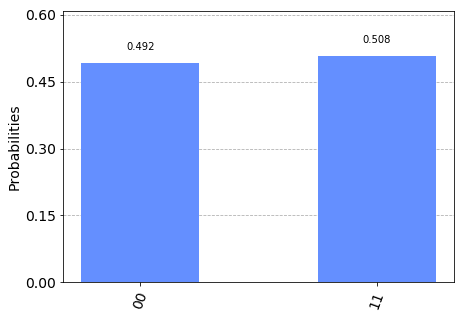

In [12]:
from qiskit.tools.visualization import plot_histogram

plot_histogram(result.get_counts(circuit))

In [13]:
# Loading my IBM account
IBMQ.load_account()

C:\Users\Daniel\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [14]:
provider = IBMQ.get_provider('ibm-q')

#Qunatum computer
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(circuit, backend=qcomp)

In [16]:
from qiskit.tools.monitor import job_monitor

#real devices so have queues
job_monitor(job)

Job Status: job has successfully run


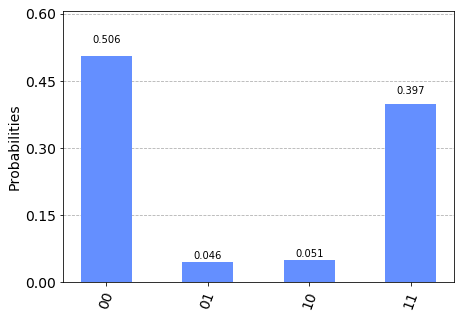

In [18]:
result = job.result()

plot_histogram(result.get_counts(circuit))